<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜: 2022-05-13
* 이름: 김민규

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [ ]:
xs = np.array([3, 5, 5, 7, 8])
ys = np.array([20, 50, 60, 90, 100])
xs.shape, ys.shape

((5,), (5,))

* 데이터 시각화

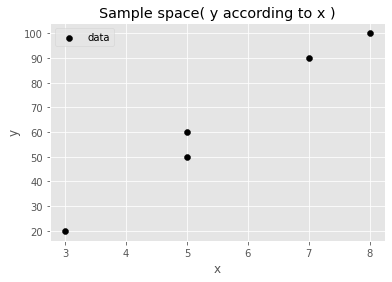

In [ ]:
plt.scatter(xs,ys,marker='o',c='k', label='data')
plt.title('Sample space( y according to x )')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [ ]:
def model_simple(x, w=1):
    return x*w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20|3|
|5|50|5|
|5|60|5|
|7|90|7|
|8|100|8|

In [ ]:
model_simple(xs)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

| 손실함수(Loss function) = 목적 함수(Objective function) = 비용 함수(Cost function) 
: 정답값과 예측 값에 대한 오차

| 손실(Lose = error) : 손실 함수로부터 얻은 정답 값과의 차이

In [ ]:
# 순전파 
def propagation(xs,ys,w):
    total_loss = 0
    for x, y in zip(xs,ys):# 모든 샘플 x, y에 대해서
        y_predict = model_simple(x, w=w) # 예측값 구하기
        loss = np.abs(y_predict-y) # 손실 구하기
        total_loss += loss # 전체 샘플의 손실 구하기
        # print(f'x, y, y_predict, loss,{x, y, y_predict, loss}')
    return total_loss

total_loss=propagation(xs,ys,w=5)
print(f'total_loss: {total_loss}')

total_loss: 180


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


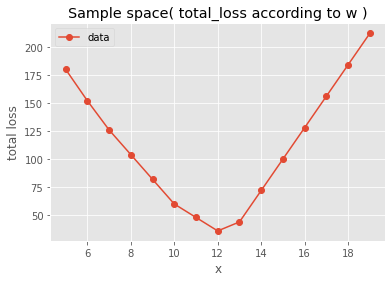

In [ ]:
ws = np.arange(5,20)
total_losses = propagation(xs, ys, ws) # w값에 따른 total loss 배열

# w 값에 따른 total_loss
plt.plot(ws, total_losses, marker='o', label='data')
plt.title('Sample space( total_loss according to w )')
plt.xlabel('x')
plt.ylabel('total loss')
plt.legend()
plt.show()
# 학습 파라미터(w)를 12로 설정하면 함수 파라미터를 가장 잘 설명 할 수 있을 것 이라는 인사이트를 얻어 낼 수 있습니다.
# total loss가 가장 작은 파라미터이기 때문입니다.

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [ ]:
w_ = 12
propagation(xs, ys, w_)

36

* 학습 완료된 모델에 대한 예측 시각화

[ 0  1  2  3  4  5  6  7  8  9 10]


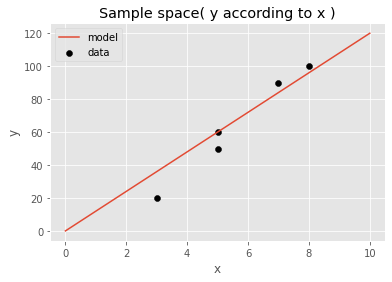

In [ ]:
x_every = np.arange(11)
print(x_every)
y_pred=model_simple(x_every,w_)

# 데이터시각화
plt.scatter(xs ,ys ,marker='o',c='k', label='data')
# 예측값 시각화
plt.plot(x_every, y_pred, label='model')
plt.title('Sample space( y according to x )')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

* 공부시간이 6시간일 때 예상 점수는?


In [ ]:
model_simple(6,w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [ ]:
x_tests = np.array([1,2,5,6,7]) 
y_tests = np.array([5,15,55,80,85])
x_tests.shape, y_tests.shape

((5,), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [ ]:
propagation(x_tests, y_tests,w_) # 손실함수

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

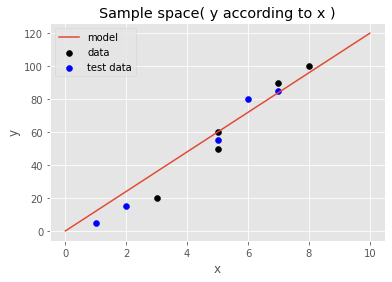

In [ ]:
# 데이터시각화
plt.scatter(xs ,ys ,marker='o',c='k', label='data')
# 예측값 시각화
plt.plot(x_every, y_pred, label='model')
# 테스트 데이터 시각화
plt.scatter(x_tests, y_tests, c='b', label='test data')
# 테스트 데이터에서도 어느정도 예측이 가능한 모델을 만들었다고 판단이 됩니다.
plt.title('Sample space( y according to x )')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [ ]:
x = np.array([2,9,6,8,4,7,7,6,8,8]).reshape(5,2)
y = np.array([20, 50, 60, 90, 100])
x.shape, y.shape

((5, 2), (5,))

* 데이터 시각화

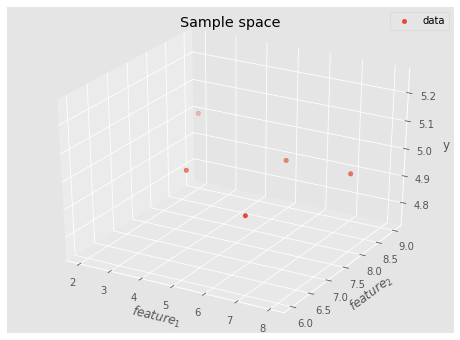

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# x1(피쳐1), x2(피쳐2), y
x1s = x[:,0] # 모든샘플, 첫번째 피쳐
x2s = x[:,1] # 모든샘플, 두번째 피쳐
ax.scatter3D(x1s,x2s,ys, label='data')

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [ ]:
def model_multi(x1,x2,w1=1,w2=1): # 찾아야하는 학습파라미터가 두 개
    return x1*w1+x2*w2

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|11
|6|8|50|14
|4|7|60|11
|7|6|90|13
|8|6|100|14

In [ ]:
xs1 , xs2 = x[:,0], x[:,1]
model_multi(xs1, xs2, w1=5, w2=1)

array([19, 38, 27, 41, 48])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
# 순전파 
def propagation(x,ys,w1,w2):
    total_loss = 0
    for x, y in zip(x,ys):# 모든 샘플 x, y에 대해서
        y_predict = model_multi(x[0],x[1], w1=w1, w2=w2) # 예측값 구하기
        loss = np.abs(y_predict-y) # 손실 구하기
        total_loss += loss # 전체 샘플의 손실 구하기
        # print(f'x, y, y_predict, loss,{x, y, y_predict, loss}')
    return total_loss

total_loss=propagation(x, ys,w1=7.5, w2=4.1)
print(f'total_loss: {total_loss}')

total_loss: 81.10000000000001


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [ ]:
w1s =np.arange(0,30)
w2s = np.arange(-10,10)
W1, W2 =np.meshgrid(w1s,w2s)

L=propagation(x, ys, W1, W2)
W1.shape, W2.shape, L.shape

((20, 30), (20, 30), (20, 30))

* 3d플롯으로 시각화

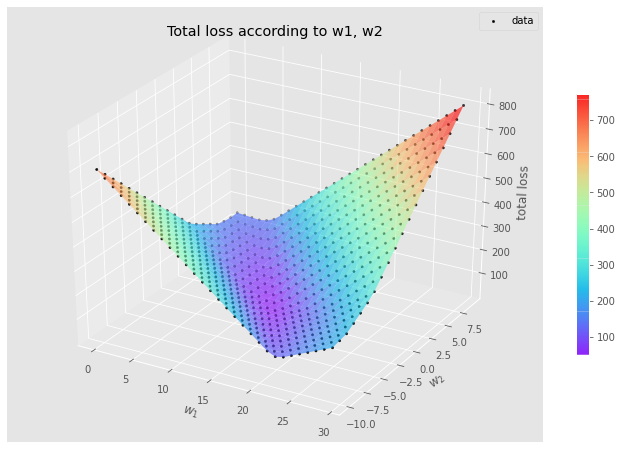

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# w1, w2에 대한 loss 시각화
ax.scatter3D(W1,W2,L,c='k',label='data',marker='.')
surf = ax.plot_surface(W1, W2, L, cmap='rainbow', alpha=0.6)
fig.colorbar(surf, shrink=0.6)

ax.set_title('Total loss according to w1, w2')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('total loss')
plt.legend()
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [ ]:
# loss가 값이 최소삾(45) 일 때, w1, w2의 값 
L.shape, np.min(L), np.where(np.min(L))
min_idx= np.argmin(L) # 최소값의 인덱스를 추출합니다.
print(min_idx)
w1_, w2_=W1.flatten()[min_idx], W2.flatten()[min_idx]
w1_, w2_, np.min(L)

284


(14, -1, 44)

* 학습 완료된 모델의 최종 손실 계산

In [ ]:
propagation(x, ys, w1_,w2_)

44

* 학습 완료된 모델에 대한 예측 시각화

In [ ]:
x1_every = np.arange(10)
x2_every = np.arange(10)
X1_every, X2_every = np.meshgrid(x1_every, x2_every)
Y_pred = model_multi(X1_every, X2_every, w1_, w2_)
X1_every.shape, X2_every.shape, Y_pred.shape

((10, 10), (10, 10), (10, 10))

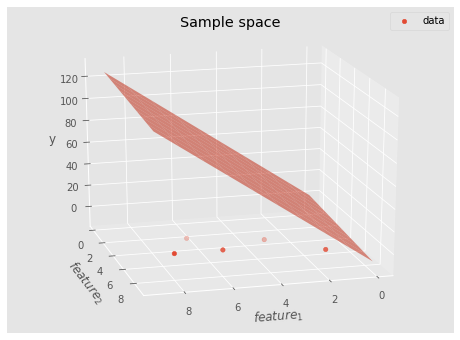

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# x1(피쳐1), x2(피쳐2), y
x1s = x[:,0] # 모든샘플, 첫번째 피쳐
x2s = x[:,1] # 모든샘플, 두번째 피쳐
ax.scatter3D(x1s,x2s,ys, label='data')
# 예측 모형
ax.plot_surface(X1_every, X2_every, Y_pred, alpha=0.6)

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')
ax.view_init(20, 75) # 상하회전, 좌우 회전
plt.legend()
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [ ]:
model_multi(xs1, xs2, w1=6, w2=5)

array([57, 76, 59, 72, 88])

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [ ]:
x_tests = np.array([2,9,6,8,4,7,7,6,8,8]).reshape(5,2)
y_tests = np.array([15,25,60,90,95])
x_tests.shape, y_tests.shape
x_tests[0:1]

array([[2, 9]])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [ ]:
def propagation(x,ys,w1,w2):
    total_loss = 0
    for x, y in zip(x,ys):# 모든 샘플 x, y에 대해서
        y_predict = model_multi(x[0],x[1], w1=w1, w2=w2) # 예측값 구하기
        loss = np.abs(y_predict-y) # 손실 구하기
        total_loss += loss # 전체 샘플의 손실 구하기
        # print(f'x, y, y_predict, loss,{x, y, y_predict, loss}')
    return total_loss

total_loss=propagation(x_tests, y_tests,w1=6, w2=5)
print(f'total_loss: {total_loss}')

total_loss: 119


* 학습 완료된 모델에 테스트 데이터 예측 시각화

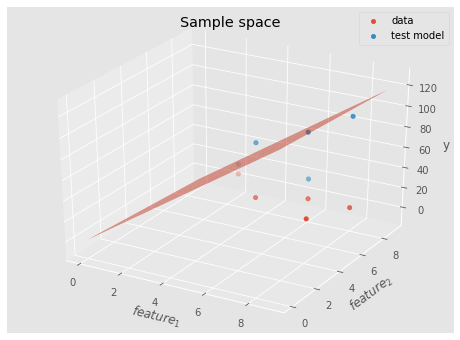

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# x1(피쳐1), x2(피쳐2), y
x1s = x[:,0] # 모든샘플, 첫번째 피쳐
x2s = x[:,1] # 모든샘플, 두번째 피쳐
ax.scatter3D(x1s,x2s,ys, label='data')
# 예측 모형
ax.plot_surface(X1_every, X2_every, Y_pred, alpha=0.6)
# 테스트 모델
ax.scatter3D(x_tests[:,0],x_tests[:,1],y_tests, label='test model')

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')
ax.view_init() # 상하회전, 좌우 회전
plt.legend()
plt.show()

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = SimpleModel() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [ ]:
class SimpleModel():
    def __init__(self,random_state=1):
        self.w=1
        self.loss=10000

    def model(self,x,w):
        return w*x

    def propagation(self, xs, ys, w):
        total_loss = 0
        for x,y in zip(xs, ys):
            y_pred = self.model(x, w=w)
            loss =np.abs(y_pred-y)
            total_loss += loss
        return total_loss/len(xs)
    
    def validation(self, x, y): # 검증
        loss = self.propagation(x, y, self.w)
        return loss

    def fit(self, x, y, grid=[-10,10]):
        for w in range(grid[0], grid[1]):
            loss_tmp = self.propagation(x, y, w)
            if self.loss > loss_tmp:
                self.loss = loss_tmp
                self.w = w
                print(f'w: {w}  loss:{np.round(loss_tmp,2)}')
            else:
                print(f'w: {w}  loss:{np.round(loss_tmp,2)}, stop learning')
                break
 
    def predict(self, x):
        pred = self.model(x, w=self.w)
        return pred

    def plot_xy(self, x, y):
        plt.scatter(x, y, c='k', label='data')
        plt.plot(x, self.model(x, self.w), c='r', label='model')
        plt.legend()
        plt.show()


        


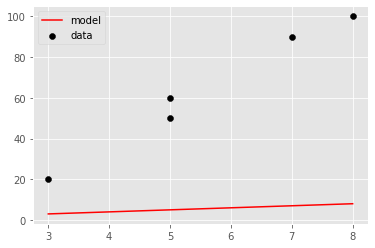

* 초기 예측값: [3 5 5 7 8]
* 초기 평가: 58.4
w: 0  loss:64.0
w: 1  loss:58.4
w: 2  loss:52.8
w: 3  loss:47.2
w: 4  loss:41.6
w: 5  loss:36.0
w: 6  loss:30.4
w: 7  loss:25.2
w: 8  loss:20.8
w: 9  loss:16.4
w: 10  loss:12.0
w: 11  loss:9.6
w: 12  loss:7.2
w: 13  loss:8.8, stop learning


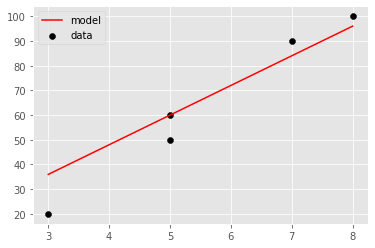

* 학습 후 예측값: [36 60 60 84 96]
* 학습 후 평가: 7.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

xs = np.array([3,5,5,7,8])
ys = np.array([20, 50, 60, 90, 100])

model = SimpleModel()
model.plot_xy(xs, ys)
print('* 초기 예측값:' , model.predict(xs))
print('* 초기 평가:', model.validation(xs, ys))

model.fit(xs, ys, [0, 15])
model.plot_xy(xs, ys)
print('* 학습 후 예측값:' , model.predict(xs))
print('* 학습 후 평가:', model.validation(xs, ys))